## CH06 Clustering機器學習實作

#### Clustering(沒有答案: 非監督式學習) 概念: 分眾行銷
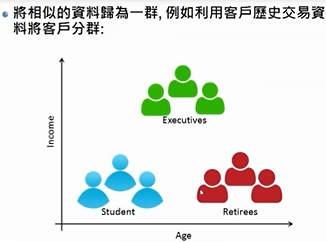
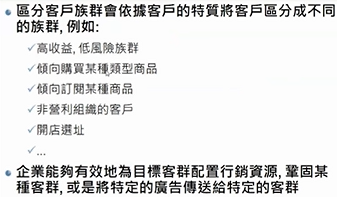
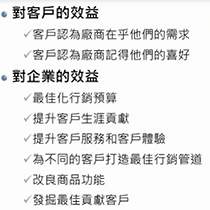

### 1. K-Means 演算法 
1. 群組核心在分群中，重新算平均值＝＞　移動核心 => 依核心重新計算每個資料並重新分配group
2. 不斷重覆改變核心，K 表示分幾群
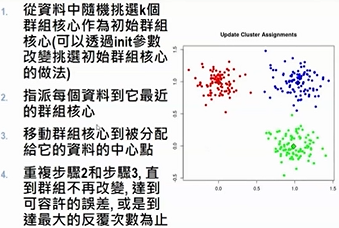
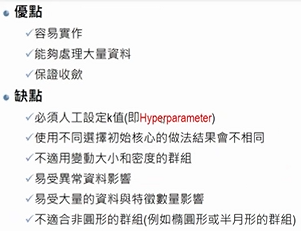
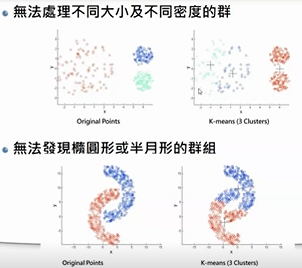
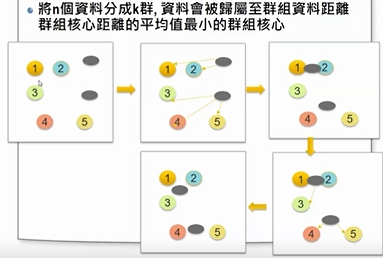
每次改中心點分群，資料重新計算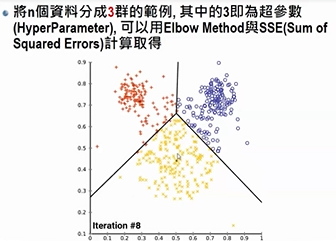
最佳K值 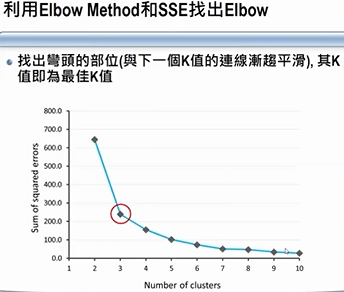

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    -1.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1.0,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1.0,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,1.0,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,2.0,Young Adult


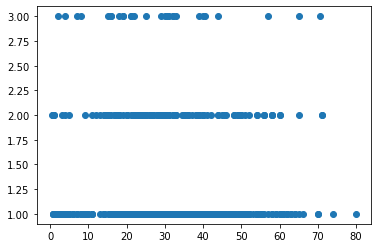

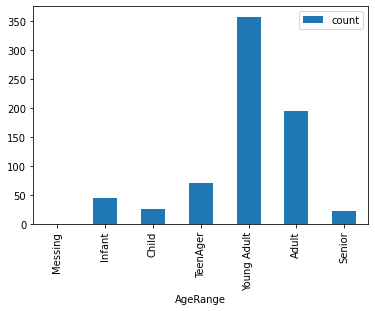

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'Datasets\titanic.csv')
display(df.head(), df.shape)

df.Embarked = df.Embarked.map({'S': 1, 'C':2, 'Q':3})
display(df)

plt.scatter(df.Age, df.Embarked)

cut_point = [-1,0,5,12,18,35,60,100]
label_names = ['Messing', 'Infant', 'Child', 'TeenAger', 'Young Adult', 'Adult', 'Senior']

df.Age = df.Age.fillna(-1)
print(df.Age)

df['AgeRange'] = pd.cut(df.Age, cut_point, labels= label_names)
display(df)

df.groupby("AgeRange")['PassengerId'].agg(['count']).plot(kind ='bar')
plt.show()

### use Cluster 演算法實作客戶分群
<b> Ps:ˋ找畫手肘最佳K值 VisualizeHelper 目錄有一個 VisualizeCluster.py 可以被直接Import Module <br>
    import VisualizeHelper.VisualizeCluster as VisualizeCluster<br>
    (python 中目錄中的.py 可以視作一個Module) </b><br>

In [23]:
###  VisualizeHelper 目錄有一個 VisualizeCluster.py 是下面程式的 module
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
# 找最佳K值，概念為: 1.當K =n => SSE =0 , 2.找出SSE 最低的K值，即最佳K值
def PlotElbow(normalized_df):  #找畫手肘最佳K值
    sse = []
    krange = list(range(2,11))
    X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
    for n in krange:
        model = cluster.KMeans(n_clusters=n, random_state=3)
        model.fit_predict(X)
        cluster_assignments = model.labels_
        centers = model.cluster_centers_
        sse.append(np.sum((X - centers[cluster_assignments]) ** 2))
        #sse.append(model.inertia_)

    plt.plot(krange, sse)
    plt.xlabel("$K$")
    plt.ylabel("Sum of Squares")
    plt.show()

def PlotCluster(cluster_df):
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['TotalSales'],
    c='red')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['TotalSales'],
    c='green')
    plt.title('TotalSales vs. OrderCount Clusters')
    plt.xlabel('Order Count')
    plt.ylabel('Total Sales')
    plt.grid()
    plt.show()
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['OrderCount'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')
    plt.title('AvgOrderValue vs. OrderCount Clusters')
    plt.xlabel('Order Count')
    plt.ylabel('Avg Order Value')
    plt.grid()
    plt.show()
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 0]['TotalSales'], 
    cluster_df.loc[cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 1]['TotalSales'], 
    cluster_df.loc[cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 2]['TotalSales'], 
    cluster_df.loc[cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange')
    plt.scatter(
    cluster_df.loc[cluster_df['Cluster'] == 3]['TotalSales'], 
    cluster_df.loc[cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green')
    plt.title('AvgOrderValue vs. TotalSales Clusters')
    plt.xlabel('Total Sales')
    plt.ylabel('Avg Order Value')
    plt.grid()
    plt.show()

In [32]:
# read Data ====================
#Customer Segmentation: A Technical Guide With Python Examples(https://www.mktr.ai/applications-and-methods-in-data-science-customer-segmentation/)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import VisualizeCluster as VisualizeCluster

# read-in the excel spreadsheet using pandas : Run 很久，因威Data 有541909 筆，每筆 8 Features
df = pd.read_excel(r'Datasets\Online Retail.xlsx', sheet_name='Online Retail')
display(df.head())
print(df.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


(541909, 8)


In [33]:
# Data Cleanup (資料整理 : training,vaverification & test 要做3次，可以寫成一個Function)
# Drop cancelled orders
df = df.loc[df['Quantity'] > 0]      # 訂單>0

# Drop records without CustomerID
df = df[pd.notnull(df['CustomerID'])]

# Drop incomplete month
df = df.loc[df['InvoiceDate'] < '2011-12-01'] #選取分析資料時間

# Calculate total sales from the Quantity and UnitPrice
df['Sales'] = df['Quantity'] * df['UnitPrice']

# use groupby to aggregate sales by CustomerID
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 'InvoiceNo': lambda x: x.nunique()})

# Select the columns we want to use
customer_df.columns = ['TotalSales', 'OrderCount'] # clustering 原則 總額高 or oder頻繁

# # create a new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']
print('customer_df.head()====================================\n')
display(customer_df.head())
# Normalize data (處理成較一致的範圍，以利分群)
# rank 排名，值高的分數高: 資料範圍差異大，將資料集中的方式
rank_df = customer_df.rank(method='first')   
print('rank_df = ')
display(rank_df) 
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
print('normalized_df.head() ==================================')
display(normalized_df.head())

#=======
VisualizeCluster.PlotCluster(normalized_df)
#=======

# # #create model
# model = KMeans(n_clusters=4).fit(normalized_df)
# # #four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
# normalized_df['Cluster'] = model.labels_   ## model.labels_ 是分好的群組
# print('normalized_df.sample(10) ==================================')
# display(normalized_df.sample(10))
# #-------------------------------------
# #DataFrame.head()
# #DataFrame.tail()
# #DataFrame.sample()
# #-------------------------------------
# # VisualizeCluster module 的 PlotCluster Functio分別劃出劃出#=======
# VisualizeCluster.PlotCluster(normalized_df)
# # #=======

# # #Find the best-selling item by cluster(每一群最佳商品: 推薦商品: 分眾行銷)
# for n in range(4):
#     cluster = normalized_df.loc[normalized_df['Cluster'] == n]
#     BestSellingItemByCluster=pd.DataFrame(df.loc[df['CustomerID'].isin(cluster.index)].groupby(
#         'Description').count()['StockCode'].sort_values(ascending=False))
#     print(BestSellingItemByCluster.head())

customer_df.head()====================================



,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


rank_df = 


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
...,...,...,...
18280.0,571.0,1537.0,1094.0
18281.0,104.0,1538.0,169.0
18282.0,158.0,1539.0,266.0


normalized_df.head() ==================================


,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622


KeyError: 'Cluster'